##Regressão Linear utilizando Gradient Descent
###O objetivo deste estudo não é ajustar o melhor modelo ao conjunto de dados, mas explorar o método do gradient descent, tentenado, através dele, ajustar a melhor regressão linear simples da variável dependente *valor de venda* e da variável independente *tamanho do imóvel*.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Data/train.csv',sep=',')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

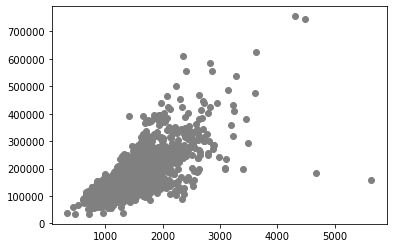

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(dataset.iloc[:,46], dataset.iloc[:,80],  color='gray')
plt.show()

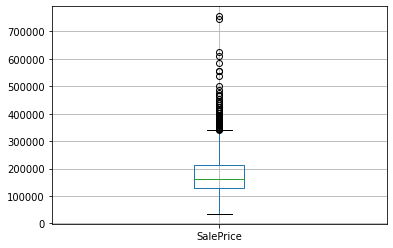

In [7]:
dataset.boxplot(column='SalePrice')

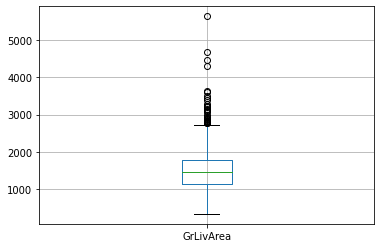

In [8]:
dataset.boxplot(column='GrLivArea')

In [9]:
dataset=dataset.iloc[:,[46,80]]
dataset.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


###Equação da regressão linear
###y = $\beta$<sub>0</sub> + $\beta$<sub>1</sub>x
\
###Fórmula do erro quadrado
###erro quadrado = (y - $\hat{y}$)<sup>2
\
###Fórmula do Mean Squared Error 
###MSE=$\frac{1}{n}$ $\sum_{i=1}^{n}$(y - $\hat{y}$)<sup>2
\
###Substituição do $\hat{y}$ pelo y da equação da regreção linear na fórmula do MSE
###MSE=$\frac{1}{n}$ $\sum_{i=1}^{n}$ (y - ($\beta$<sub>0</sub>+$\beta$<sub>1</sub>x))<sup>2
\
###Cost Function
###J($\theta$)=$\frac{1}{n}$ $\sum_{i=1}^{n}$(y - ($\theta$<sub>0</sub>+$\theta$<sub>1</sub>x)<sup>2
\
###Derivada parcial de J($\theta$) em relação a $\theta$<sub>0</sub>

###$\frac{1}{n}\sum_{i=1}^{n}\frac{\partial\theta}{\partial\theta_{0}}=\frac{1}{n}\sum_{i=1}^{n}$2(y - ($\theta$<sub>0</sub>+$\theta$<sub>1</sub>x))(0-(1-0))
###$\frac{1}{n}\sum_{i=1}^{n}\frac{\partial\theta}{\partial\theta_{0}}=\frac{1}{n}\sum_{i=1}^{n}$-2(y - ($\theta$<sub>0</sub>+$\theta$<sub>1</sub>x))
\
###Derivada parcial de J($\theta$) em relação a $\theta$<sub>1</sub>
###$\frac{1}{n}\sum_{i=1}^{n}\frac{\partial\theta}{\partial\theta_{0}}=\frac{1}{n}\sum_{i=1}^{n}$2(y - ($\theta$<sub>0</sub>+$\theta$<sub>1</sub>x))(0-(0-1x))
###$\frac{1}{n}\sum_{i=1}^{n}\frac{\partial\theta}{\partial\theta_{0}}=\frac{1}{n}\sum_{i=1}^{n}$-2x(y - ($\theta$<sub>0</sub>+$\theta$<sub>1</sub>x))
\
###Gradient Descent - Minimizar
###$\theta$<sub>J</sub>(novo) := $\theta$<sub>J</sub>(anterior) - $\alpha$* $\frac{\partial\theta}{\partial\theta_{i}} $J($\theta$<sub>0</sub>, $\theta$<sub>1</sub>)<br/>$\alpha$=step<br/>(repetir até convergir)



In [10]:
def linear_regression(data,a,b,step):
  #normalização dos dados
  data_nor=data.copy(deep=True)
  for i in data:
    n=[]
    for c in data[i]:
      norm=(c-min(data[i]))/(max(data[i])-min(data[i]))
      n.append(norm)
    data_nor[i]=n
  matrix=data_nor.to_numpy()
  #definição das variáveis
  theta0=a
  theta1=b
  alpha=step
  y=matrix[:,1]
  x=matrix[:,0]
  #Gradient Descent
  der_J_theta0=1 
  der_J_theta1=1
  linear_regression.J_theta_l=[[],[]]
  linear_regression.theta0_l=[]
  linear_regression.theta1_l=[] 
  linear_regression.cost_J_l=[]
  while (der_J_theta0>0.0001) or (der_J_theta1>0.0001): #while continua enquanto: TT, TF, FT
    y_pred=theta0+theta1*x #equação da regressão
    erro=y-y_pred
    SE=((erro)**2) #fórmula do erro quadrado
    MSE=np.mean(SE) #fórmula do MSE
    cost_J_theta=MSE #função de custo J_theta
    der_theta0=-2*(erro) 
    der_theta1=-2*x*(erro) 
    der_J_theta0=np.mean(der_theta0) #derivada de J_theta em relação a theta_0
    der_J_theta1=np.mean(der_theta1) #derivada de J_theta em relação a theta_1
    theta0=theta0-alpha*der_J_theta0 #gradient descent de J_theta_0
    theta1=theta1-alpha*der_J_theta1 #gradient descent de J_theta_1
    linear_regression.theta0_l.append(theta0)
    linear_regression.theta1_l.append(theta1)
    linear_regression.J_theta_l[0].append(der_J_theta0)
    linear_regression.J_theta_l[1].append(der_J_theta1)
    linear_regression.cost_J_l.append(cost_J_theta)
    #print('cost: '+str(cost_J)+' derivada_J_theta0: '+str(der_J_theta0)+' derivada_J_theta1: '+str(der_J_theta1))
  #retorno dos coeficientes para a escala original através de sistema de equações lineares
  #inversão das variáveis de theta_0 e theta_1 para x e y
  x1=0.4 #fixa valor para x para primeira equação
  x2=0.1 #fixa valor para x para segunda equação
  y1=theta0+(theta1*x1) #encontra y1 com base nos coeficientes normalizados
  y2=theta0+(theta1*x2) #encontra y2 com base nos coeficientes normalizados
  x1_or=x1*(max(data.iloc[:,0])-min(data.iloc[:,0]))+min(data.iloc[:,0]) #retorno de x1 para a escala original
  x2_or=x2*(max(data.iloc[:,0])-min(data.iloc[:,0]))+min(data.iloc[:,0]) #retorno de x2 para a escala original
  y1_or=y1*(max(data.iloc[:,1])-min(data.iloc[:,1]))+min(data.iloc[:,1]) #retorno de y1 para a escala original
  y2_or=y2*(max(data.iloc[:,1])-min(data.iloc[:,1]))+min(data.iloc[:,1]) #retorno de y2 para a escala original
  #sistema de equações lineares
  #beta_0+beta_1*x1=y1
  #beta_0+beta_1*x2=y2
  A=np.matrix([[1,x1_or],[1,x2_or]]) #matriz das variáveis x
  B=np.matrix([[y1_or],[y2_or]]) #matriz das variáveis y
  A_inv=np.linalg.inv(A) #matriz inversa de A
  C=A_inv.dot(B) #solução do sistema de equações lineares
  linear_regression.beta_0=round(C.item(0),2)
  linear_regression.beta_1=round(C.item(1),2)
  #R quadrado
  rss=np.mean(SE)
  y_med=np.mean(y)
  tss=np.mean((y-y_med)**2)
  linear_regression.r_sq=1-(rss/tss)
  print('linear regression equation: '+str(linear_regression.beta_0)+' + '+str(linear_regression.beta_1)+'*x')
  print('R squared: '+str(round(linear_regression.r_sq*100,2))+'%')

In [11]:
linear_regression(dataset,1,1,0.1)

linear regression equation: 20088.32 + 106.15*x
R squared: 50.21%


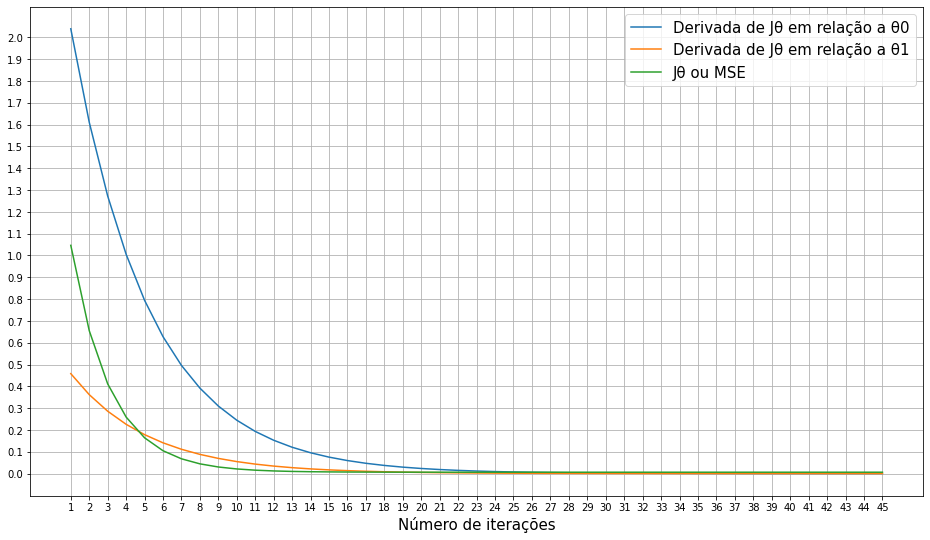

In [12]:
plt.rcParams['figure.figsize']=(16,9)
y1=linear_regression.J_theta_l[0]
y2=linear_regression.J_theta_l[1]
y3=linear_regression.cost_J_l
x=range(1,len(linear_regression.theta1_l)+1)
plt.plot(x,y1,label='Derivada de Jθ em relação a θ0')
plt.plot(x,y2,label='Derivada de Jθ em relação a θ1')
plt.plot(x,y3,label='Jθ ou MSE')
plt.xlabel('Número de iterações',fontsize=15)
plt.xticks(np.arange(1,len(linear_regression.theta1_l)+1,step=1))
plt.yticks(np.arange(0,max(linear_regression.J_theta_l[0]),step=0.1))
plt.legend(fontsize=15)
plt.grid(True)

Text(4800, 470000, 'r_squared=0.5021')

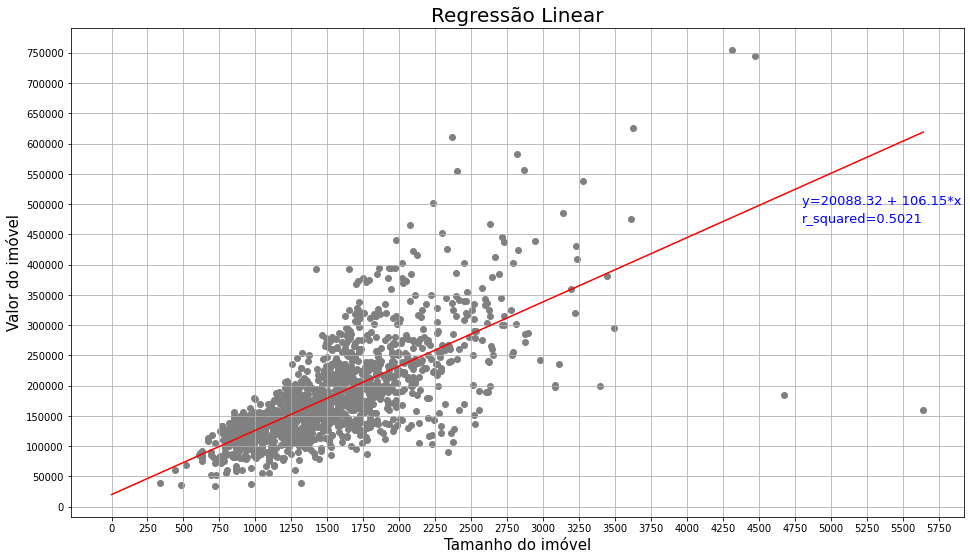

In [13]:
plt.rcParams['figure.figsize']=(16,9)
x_sort=dataset.iloc[:,0].sort_values()
x=np.linspace(0,x_sort.iloc[-1])
y=linear_regression.beta_0+linear_regression.beta_1*x
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,1],  color='gray')
plt.plot(x,y, color='red')
plt.grid(True)
plt.xticks(np.arange(0,max(x_sort)+250,step=250))
plt.yticks(np.arange(0,dataset.iloc[:,[1]].max().unique(),step=50000))
plt.xlabel('Tamanho do imóvel',fontsize=15)
plt.ylabel('Valor do imóvel',fontsize=15)
plt.title('Regressão Linear',fontsize=20)
plt.text(4800, 500000, "y="+str(linear_regression.beta_0)+' + '+str(linear_regression.beta_1)+'*x', color='blue', fontsize=13)
plt.text(4800, 470000, "r_squared="+str(round(linear_regression.r_sq,4)), color='blue', fontsize=13)

###Comparação com o resultado da mesma regressão linear no sklearn

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X=dataset['GrLivArea'].values.reshape(-1,1)
y=dataset['SalePrice'].values.reshape(-1,1)

In [16]:
regressor = LinearRegression()  
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print('Comparação dos coeficientes e R squared')
print()
print('linear regression equation: '+str(linear_regression.beta_0)+' + '+str(linear_regression.beta_1)+'*x')
print('R squared: '+str(round(linear_regression.r_sq*100,2))+'%')
print()
print('linear regression equation Sklearn: '+str(round(regressor.intercept_[0],2))+' + '+str(round(regressor.coef_[0][0],2))+'*x')
print('R squared SkLearn: '+str(round(regressor.score(X,y)*100,2))+'%')

Comparação dos coeficientes e R squared

linear regression equation: 20088.32 + 106.15*x
R squared: 50.21%

linear regression equation Sklearn: 18569.03 + 107.13*x
R squared SkLearn: 50.21%
